## Esercizio Classificazione NLP1

In [53]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/NLPes1.csv'
df = pd.read_csv(path)
df

,text,class
0,b'insane ( but inspired ) musical about alferd...,1
1,b'written by david j . schow and john shirley ...,0
2,"b'miramax "" disinvited "" on-line media from pr...",0
3,"b'in "" the astronaut\'s wife , "" charlize ther...",0
4,b'one of the 90s\' most unwelcome thriller tre...,0
...,...,...
408,"b'hav plenty , as we are told in the beginning...",0
409,b'brian de palma\'s snake eyes stars nicolas c...,0
410,b'contact ( pg ) there\'s a moment late in rob...,1
411,"b""this is a film that i was inclined to like a...",0


In [54]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
df = pd.read_csv(path)

import re

words_to_remove = ['gargamella', 'doggy', 'word3']
words_pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

patterns = {
            r"[a-zA-Z]+n\'t": 'not',
            r'\s+': ' ',             # Substitute multiple spaces with a single space
            r'\d+': '',              # Remove digits
            r'[^\w\s]': '',          # Remove punctuation and symbols
            r'\b\w{1,2}\b': '',      # Remove all tokens less than 2 characters
            r'(http|www)[^\s]+': '', # Remove websites
            words_pattern: ''        # Remove specific words
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    df[column] = df[column].str.lower() # Apply lowercase transformation
    return df

#solo in preview
clean_column(df, 'text', patterns)

,text,class
0,binsane but inspired musical about alferd pa...,1
1,bwritten david schow and john shirley base...,0
2,bmiramax disinvited online media from press ...,0
3,bin the astronauts wife charlize theron pla...,0
4,bone the most unwelcome thriller trends retu...,0
...,...,...
408,bhav plenty are told the beginning and rem...,0
409,bbrian palmas snake eyes stars nicolas cages ...,0
410,bcontact theres moment late robert zemeck...,1
411,bthis film that was inclined like the out...,0


In [55]:
# applichiamo la regex
df = clean_column(df, 'text', patterns)
df

,text,class
0,binsane but inspired musical about alferd pack...,1
1,bwritten david schow and john shirley based th...,0
2,bmiramax disinvited online media from press sc...,0
3,bin the astronauts wife charlize theron plays ...,0
4,bone the most unwelcome thriller trends return...,0
...,...,...
408,bhav plenty are told the beginning and reminde...,0
409,bbrian palmas snake eyes stars nicolas cages e...,0
410,bcontact theres moment late robert zemeckiss c...,1
411,bthis film that was inclined like the outset t...,0


In [56]:
df['text'][0]

'binsane but inspired musical about alferd packer the first man ever tried for cannibalism america nas the story unfolds learn what events led packer trey parker supposedly killing and eating the five men who got lost while accompanying him through the mountains colorado search gold nthroughout packer must contend with evil trappers bent stealing his prized horse tribe ute indians that doesnt seem quite the mark and terrible winter storm that leads the eventual cannibalism nparker obviously knows his musicals very well because the viewer also treated some the most maddeningly catchy songs appear film would accomplish this again his postcannibal nmusical motion picture south park bigger longer and uncut napart from the inherent interest seeing pre south park parker and stone their first effort cannibal nalso offers some pretty decent laughs nthe aforementioned ute indian tribe that packers group encounters definite highlight are two rousing musical numbers about snowmen one which ends c

In [57]:
text = list(map(str, df['text']))
text = ''.join(text)

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

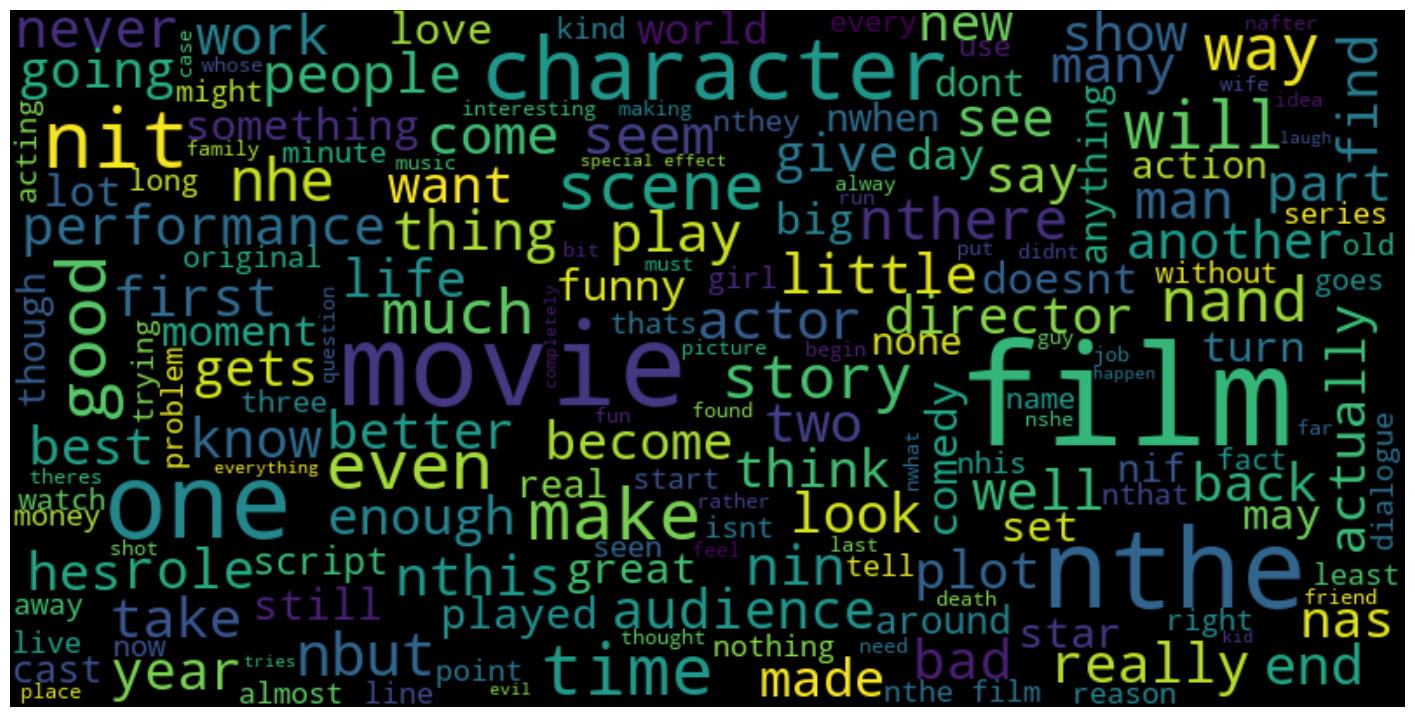

In [58]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [59]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [60]:
#df = df.dropna()

In [61]:
##STEP 3: Definizre X e y (features testuali e Target)

X = df['text']
y = df['class']

In [62]:
##STEP 4: Vettorizzazione - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=15000, min_df=5, max_df=0.7,stop_words="english") #solo se errore memoria
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
X_vect.shape

(413, 4063)

In [64]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.0470105 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06120711, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
X_tfidf.shape

(413, 4063)

In [88]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y
                                                    )

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf'),
               MultinomialNB(alpha=0.1),
               SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,random_state=667,
                             max_iter=5, tol=None)

               ]

for cls in classifiers:
    cls.fit(X_train, y_train)
     


In [68]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score

for clf in classifiers :
    # accuracy score on the test data
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(type(clf).__name__,score)
    

DecisionTreeClassifier 0.6370967741935484
RandomForestClassifier 0.717741935483871
GradientBoostingClassifier 0.7741935483870968
LogisticRegression 0.6935483870967742
GaussianNB 0.6693548387096774
KNeighborsClassifier 0.6774193548387096
SVC 0.6935483870967742
MultinomialNB 0.7419354838709677
SGDClassifier 0.8064516129032258


In [69]:
#labels = ['Class0', 'Class1']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        86
           1       0.77      0.53      0.62        38

    accuracy                           0.81       124
   macro avg       0.79      0.73      0.75       124
weighted avg       0.80      0.81      0.79       124



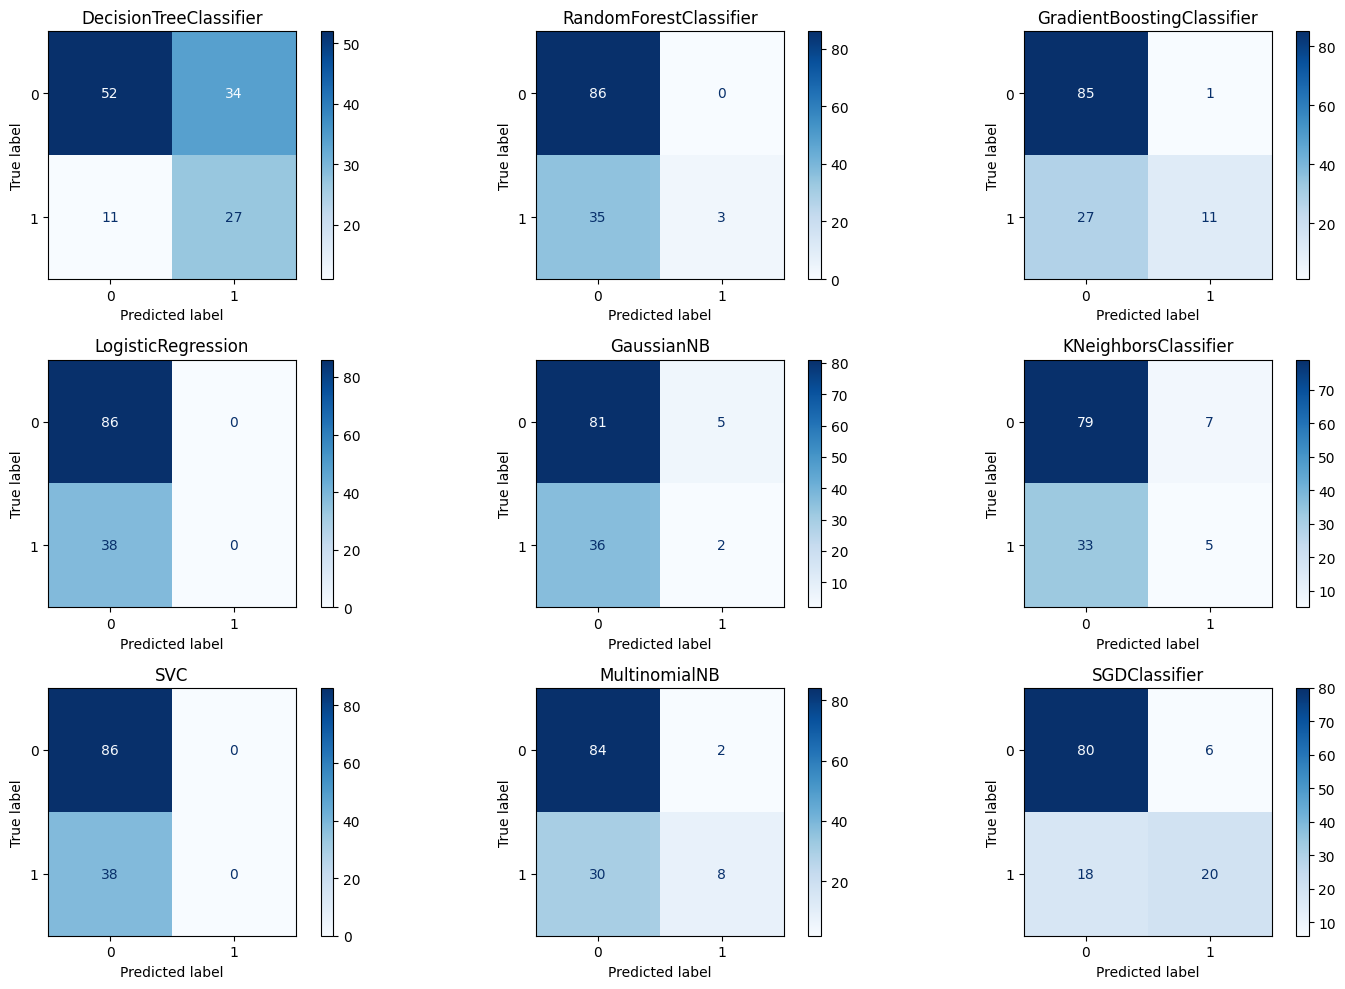

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues'
                                            
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()

In [71]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.8064516129032258

# Pipeline

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, patterns):
        self.patterns = patterns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = pd.DataFrame(X, columns=['text'])
        df = clean_column(df, 'text', self.patterns)
        return df['text'].values

In [89]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train_, X_test_, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y
                                                    )


from sklearn.pipeline import Pipeline

text_cleaner = TextCleaner(patterns)
bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words='english')
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('text cleaner', text_cleaner),
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train_, y_train)

y_pred = pipe.predict(X_test_)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.782258064516129


In [85]:
#labels = ['Class0', 'Class1']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        86
           1       0.74      0.45      0.56        38

    accuracy                           0.78       124
   macro avg       0.77      0.69      0.71       124
weighted avg       0.78      0.78      0.76       124



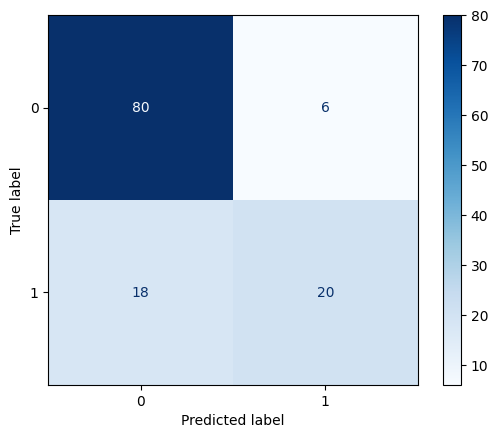

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

ConfusionMatrixDisplay.from_estimator(cls,
                                        X_test,
                                        y_test,
                                        cmap='Blues' 
                                        )


In [92]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.75       0.76923077 0.82692308 0.78846154 0.82692308 0.78431373
 0.78431373 0.74509804]
mean=0.7844079939668175
std=0.02870331926725185


In [93]:
import joblib
joblib.dump(pipe,'NLPEs1.pkl')

['NLPEs1.pkl']

In [94]:
import joblib

uploaded_model = joblib.load('NLPEs1.pkl')
pred = uploaded_model.predict(["insane but inspired musical about alferd packer the first man ever tried for cannibalism america nas the story unfolds learn what events led packer trey parker supposedly killing and eating the five men who got lost while accompanying him through the mountains colorado search gold nthroughout packer must contend with evil trappers bent stealing his prized horse tribe ute indians that doesnt seem quite the mark and terrible winter storm that leads the eventual cannibalism nparker obviously knows his musicals very well because the viewer also treated some the most maddeningly catchy "]) # 1 -->
pred[0]

np.int64(1)